# Exploratory data analysis (EDA)

In [2]:
# ==========================================
# PASO 1: CARGAR LIBRERÍAS Y DATOS
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../dataset/dataset.csv')

print(f"El dataset completo tiene {df.shape[0]} canciones y {df.shape[1]} columnas.")

El dataset completo tiene 114000 canciones y 21 columnas.


In [3]:
# ==========================================
# PASO 2: FILTRADO INTELIGENTE
# ==========================================
# Este dataset tiene 114 géneros. Para la práctica, vamos a elegir 4 muy distintos
generos_a_elegir = ['acoustic', 'hard-rock', 'dance', 'classical']


# Filtramos el dataset para quedarnos solo con esos 4
datos = df[df['track_genre'].isin(generos_a_elegir)].copy()

print(f"\nNos hemos quedado con {len(datos)} canciones de los géneros: {generos_a_elegir}")
print(datos['track_genre'].value_counts())


Nos hemos quedado con 4000 canciones de los géneros: ['acoustic', 'hard-rock', 'dance', 'classical']
track_genre
acoustic     1000
classical    1000
dance        1000
hard-rock    1000
Name: count, dtype: int64


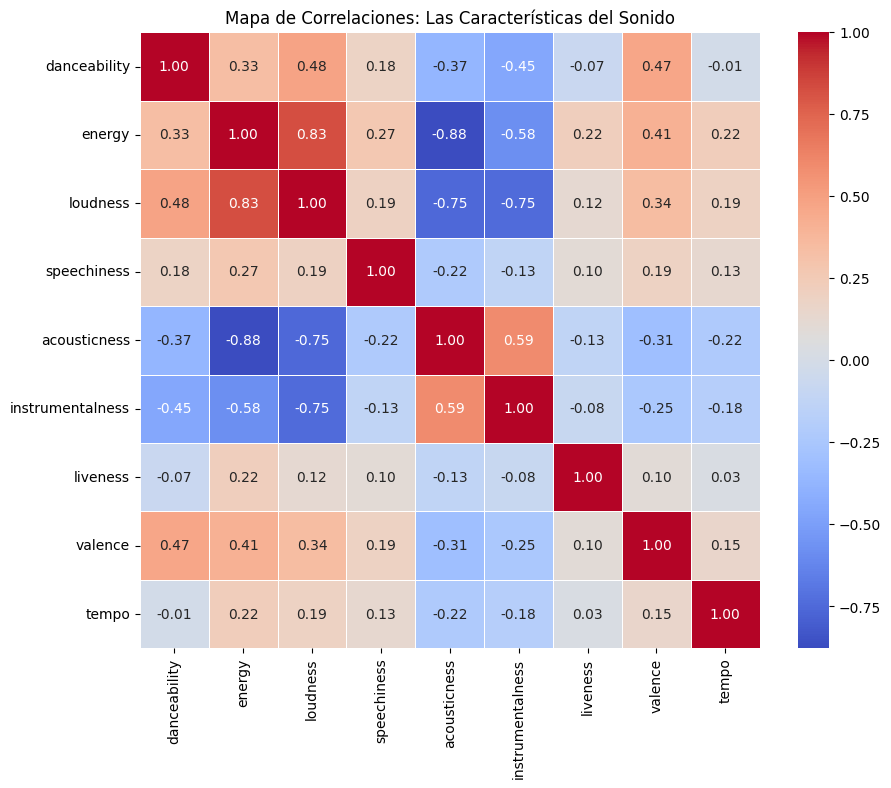

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# EDA PARTE 1: MAPA DE CALOR (CORRELACIONES) - LIMPIO
# ==========================================
plt.figure(figsize=(10, 8))

# 1. Definimos manualmente las columnas que realmente son AUDIO
# Excluimos 'Unnamed: 0', 'popularity' (no es sonido), 'key', etc.
cols_audio = [
    'danceability', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

# 2. Calculamos la correlación solo de esas columnas
matriz_corr = datos[cols_audio].corr()

# 3. Pintamos el mapa
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlaciones: Las Características del Sonido')
plt.show()

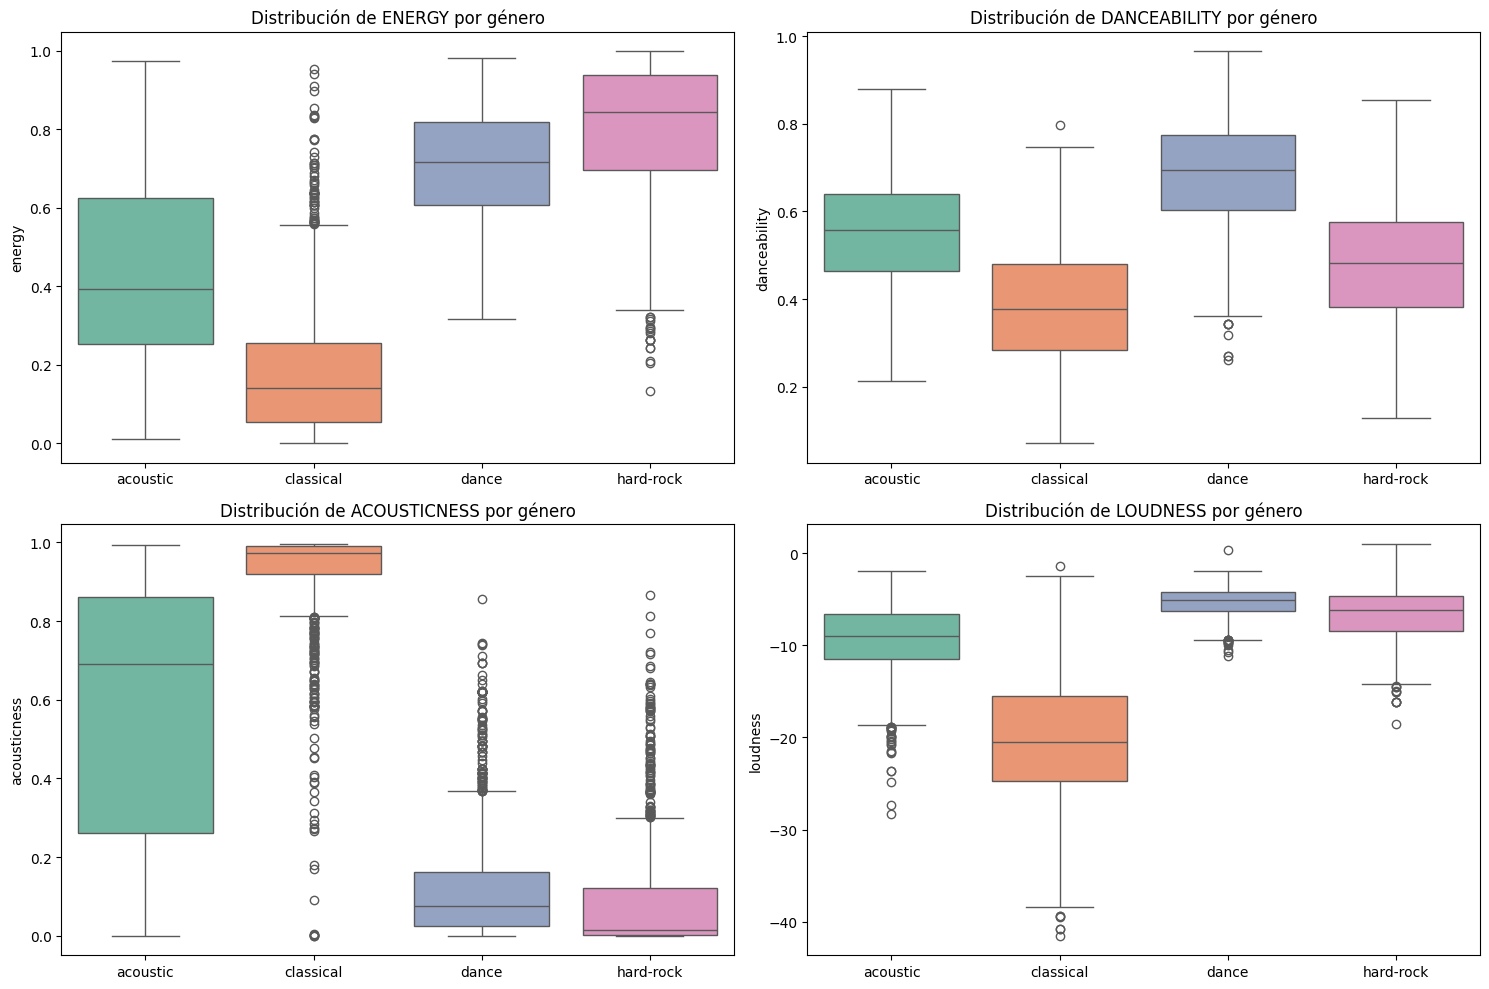

In [5]:
# ==========================================
# EDA PARTE 2: RADIOGRAFÍA DE LOS GÉNEROS (CORREGIDO)
# ==========================================
features_clave = ['energy', 'danceability', 'acousticness', 'loudness']

plt.figure(figsize=(15, 10))

for i, col in enumerate(features_clave):
    plt.subplot(2, 2, i+1) # Grid de 2x2 gráficos
    
    sns.boxplot(
        x='track_genre', 
        y=col, 
        data=datos, 
        hue='track_genre',  # <--- ESTO ES LO NUEVO
        palette='Set2', 
        legend=False        # <--- ESTO TAMBIÉN
    )
    
    plt.title(f'Distribución de {col.upper()} por género')
    plt.xlabel('') # Quitamos la etiqueta X para que quede más limpio

plt.tight_layout()
plt.show()

In [6]:
# ==========================================
# PASO 3: PREPARACIÓN (Preprocesamiento)
# ==========================================
# Quitamos las columnas de texto que no son características de audio (ID, nombre, artista, album...)
# Mantenemos 'track_genre' porque es lo que queremos predecir (y)
columnas_sobrantes = ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'Unnamed: 0']

# Si alguna columna da error porque no existe, el código la ignorará (errors='ignore')
X = datos.drop(columns=columnas_sobrantes + ['track_genre'], errors='ignore')
y = datos['track_genre']

# Convertimos las etiquetas de texto (rock, pop) a números (0, 1) para que la IA entienda mejor
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)

In [7]:
# ==========================================
# PASO 4: ENTRENAR LA IA
# ==========================================
print("\nEntrenando el modelo... (esto puede tardar unos segundos)")
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
print("¡Entrenamiento completado!")


Entrenando el modelo... (esto puede tardar unos segundos)
¡Entrenamiento completado!



🎯 PRECISIÓN DEL MODELO: 89.50%
------------------------------

Informe de Clasificación:
              precision    recall  f1-score   support

    acoustic       0.83      0.84      0.83       411
   classical       0.95      0.90      0.93       410
       dance       0.96      0.94      0.95       395
   hard-rock       0.85      0.90      0.88       384

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



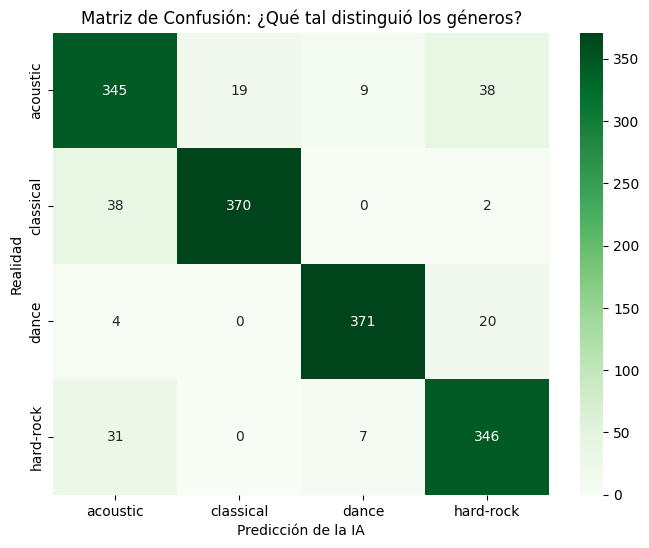

In [8]:
# ==========================================
# PASO 5: RESULTADOS
# ==========================================
predicciones = modelo.predict(X_test)
precision = accuracy_score(y_test, predicciones)

# Volvemos a convertir los números a nombres para que el reporte se entienda (ej: 0 -> acoustic)
nombres_generos = le.classes_

print(f"\n🎯 PRECISIÓN DEL MODELO: {precision * 100:.2f}%")
print("-" * 30)

# Informe detallado
print("\nInforme de Clasificación:")
print(classification_report(y_test, predicciones, target_names=nombres_generos))

# Matriz de Confusión Gráfica
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt='d', cmap='Greens',
            xticklabels=nombres_generos, yticklabels=nombres_generos)
plt.title('Matriz de Confusión: ¿Qué tal distinguió los géneros?')
plt.ylabel('Realidad')
plt.xlabel('Predicción de la IA')
plt.show()

🤖 Iniciando búsqueda automática de hiperparámetros...
Esto probará todas las combinaciones para encontrar la mejor. Paciencia...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

✅ ¡Búsqueda completada!
Los MEJORES parámetros encontrados son: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
La mejor precisión durante la búsqueda fue: 89.12%

Informe de Clasificación:
              precision    recall  f1-score   support

    acoustic       0.82      0.82      0.82       411
   classical       0.94      0.90      0.92       410
       dance       0.96      0.92      0.94       395
   hard-rock       0.83      0.90      0.86       384

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



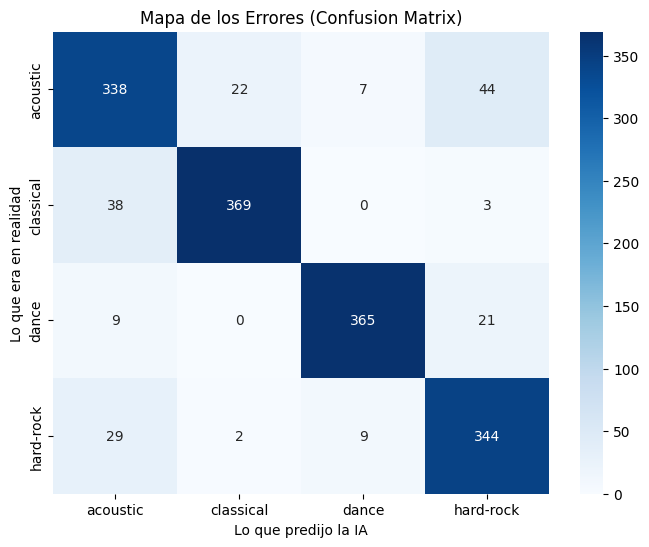

In [9]:
# ==========================================
# PASO EXTRA PRO: BUSCANDO LA CONFIGURACIÓN PERFECTA
# ==========================================
from sklearn.model_selection import GridSearchCV

# 1. Definimos qué queremos probar
# n_estimators: Número de árboles (50, 100, 200)
# max_depth: Profundidad máxima del árbol (None = sin limite, 10, 20)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5]
}

print("🤖 Iniciando búsqueda automática de hiperparámetros...")
print("Esto probará todas las combinaciones para encontrar la mejor. Paciencia...")

# 2. Configuramos el buscador (GridSearchCV)
# cv=5 significa que valida 5 veces cada combinación (validación cruzada)
rf_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 3. Entrenamos (¡Esto tardará un poco más!)
grid_search.fit(X_train, y_train)

# 4. Resultados
best_model = grid_search.best_estimator_
print("\n✅ ¡Búsqueda completada!")
print(f"Los MEJORES parámetros encontrados son: {grid_search.best_params_}")
print(f"La mejor precisión durante la búsqueda fue: {grid_search.best_score_*100:.2f}%")

# 5. Usamos el modelo ganador para predecir (Sustituye a tu modelo anterior)
modelo = best_model

pred_final = best_model.predict(X_test)

# Informe detallado
print("\nInforme de Clasificación:")
print(classification_report(y_test, pred_final, target_names=nombres_generos))

# Matriz de confusión
cm = confusion_matrix(y_test, pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Lo que predijo la IA')
plt.ylabel('Lo que era en realidad')
plt.title('Mapa de los Errores (Confusion Matrix)')
plt.show()

🤖 Iniciando búsqueda automática de hiperparámetros...
Esto probará todas las combinaciones para encontrar la mejor. Paciencia...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

✅ ¡Búsqueda completada!
Los MEJORES parámetros encontrados son: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
La mejor precisión durante la búsqueda fue: 89.12%

Informe de Clasificación:
              precision    recall  f1-score   support

    acoustic       0.82      0.82      0.82       411
   classical       0.94      0.90      0.92       410
       dance       0.96      0.92      0.94       395
   hard-rock       0.83      0.90      0.86       384

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



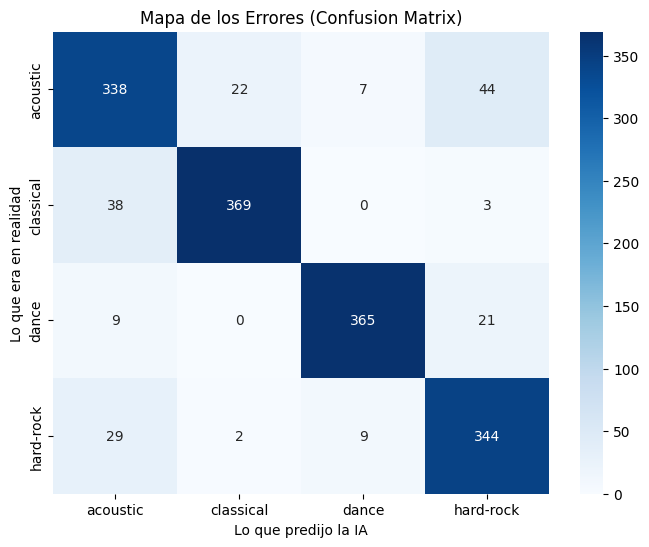

In [10]:
# ==========================================
# PASO EXTRA PRO: BUSCANDO LA CONFIGURACIÓN PERFECTA
# ==========================================
from sklearn.model_selection import GridSearchCV

# 1. Definimos qué queremos probar
# n_estimators: Número de árboles (50, 100, 200)
# max_depth: Profundidad máxima del árbol (None = sin limite, 10, 20)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5]
}

print("🤖 Iniciando búsqueda automática de hiperparámetros...")
print("Esto probará todas las combinaciones para encontrar la mejor. Paciencia...")

# 2. Configuramos el buscador (GridSearchCV)
# cv=5 significa que valida 5 veces cada combinación (validación cruzada)
rf_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 3. Entrenamos (¡Esto tardará un poco más!)
grid_search.fit(X_train, y_train)

# 4. Resultados
best_model = grid_search.best_estimator_
print("\n✅ ¡Búsqueda completada!")
print(f"Los MEJORES parámetros encontrados son: {grid_search.best_params_}")
print(f"La mejor precisión durante la búsqueda fue: {grid_search.best_score_*100:.2f}%")

# 5. Usamos el modelo ganador para predecir (Sustituye a tu modelo anterior)
modelo = best_model

pred_final = best_model.predict(X_test)

# Informe detallado
print("\nInforme de Clasificación:")
print(classification_report(y_test, pred_final, target_names=nombres_generos))

# Matriz de confusión
cm = confusion_matrix(y_test, pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Lo que predijo la IA')
plt.ylabel('Lo que era en realidad')
plt.title('Mapa de los Errores (Confusion Matrix)')
plt.show()

In [11]:
# ==========================================
# RANDOM FOREST vs XGBOOST
# ==========================================
from xgboost import XGBClassifier

print("🚀 Entrenando XGBoost (El algoritmo de los campeones)...")

# 1. Configuración de XGBoost
# n_estimators: Número de árboles correctivos
# learning_rate: Velocidad de aprendizaje (si es bajo, aprende más fino pero tarda más)
xgb_model = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=6, 
    random_state=42,
    n_jobs=-1 # Usa todos los núcleos del procesador
)

# 2. Entrenamos
xgb_model.fit(X_train, y_train)

# 3. Comparamos resultados
pred_rf = best_model.predict(X_test)
pred_xgb = xgb_model.predict(X_test)

acc_rf = accuracy_score(y_test, pred_rf)
acc_xgb = accuracy_score(y_test, pred_xgb)

print("\n🥊 EL DUELO FINAL 🥊")
print("-" * 30)
print(f"🌲 Random Forest (Optimizado): {acc_rf*100:.2f}%")
print(f"🚀 XGBoost (Gradient Boosting): {acc_xgb*100:.2f}%")

# Informe del nuevo modelo
print("\nInforme de XGBoost:")
print(classification_report(y_test, pred_xgb, target_names=le.classes_))

🚀 Entrenando XGBoost (El algoritmo de los campeones)...

🥊 EL DUELO FINAL 🥊
------------------------------
🌲 Random Forest (Optimizado): 88.50%
🚀 XGBoost (Gradient Boosting): 89.81%

Informe de XGBoost:
              precision    recall  f1-score   support

    acoustic       0.85      0.85      0.85       411
   classical       0.93      0.92      0.93       410
       dance       0.95      0.93      0.94       395
   hard-rock       0.86      0.89      0.88       384

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [12]:
# ==========================================
# XGBOOST GridSearchCV
# ==========================================
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

print("🏎️ Iniciando Tuning de Hiperparámetros para XGBoost...")
print("Esto puede tardar un poco (estamos probando muchas configuraciones)...")

# 1. Definimos la rejilla de opciones
# XGBoost tiene muchos parámetros, aquí probamos los más importantes
param_grid_xgb = {
    'n_estimators': [100, 200],        # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2], # Velocidad de aprendizaje (menor es más preciso pero lento)
    'max_depth': [3, 6, 10],           # Profundidad de los árboles
    'subsample': [0.8, 1.0],           # % de datos usados por árbol (evita overfitting)
    'colsample_bytree': [0.8, 1.0]     # % de columnas usadas por árbol
}

# 2. Configuramos el modelo base
xgb_base = XGBClassifier(random_state=42, n_jobs=-1, eval_metric='mlogloss')

# 3. Configuramos la búsqueda
# cv=3 para que no tarde una eternidad
grid_xgb = GridSearchCV(estimator=xgb_base, param_grid=param_grid_xgb, 
                        cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# 4. ¡A ENTRENAR!
grid_xgb.fit(X_train, y_train)

# 5. Resultados
best_xgb = grid_xgb.best_estimator_

print("\n✅ ¡XGBoost optimizado encontrado!")
print(f"Mejores parámetros: {grid_xgb.best_params_}")
print(f"Precisión en validación: {grid_xgb.best_score_*100:.2f}%")

# 6. Evaluación FINAL en Test
pred_best_xgb = best_xgb.predict(X_test)
acc_best_xgb = accuracy_score(y_test, pred_best_xgb)

print("\n🥊 RESULTADO FINAL XGBOOST OPTIMIZADO 🥊")
print("-" * 40)
print(f"Precisión en Test: {acc_best_xgb*100:.2f}%")
print(classification_report(y_test, pred_best_xgb, target_names=le.classes_))

🏎️ Iniciando Tuning de Hiperparámetros para XGBoost...
Esto puede tardar un poco (estamos probando muchas configuraciones)...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

✅ ¡XGBoost optimizado encontrado!
Mejores parámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Precisión en validación: 90.75%

🥊 RESULTADO FINAL XGBOOST OPTIMIZADO 🥊
----------------------------------------
Precisión en Test: 90.06%
              precision    recall  f1-score   support

    acoustic       0.85      0.86      0.85       411
   classical       0.95      0.92      0.94       410
       dance       0.95      0.92      0.94       395
   hard-rock       0.86      0.90      0.88       384

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600

